3
Je ravnovesje
Premer zadnjega grafa: 2


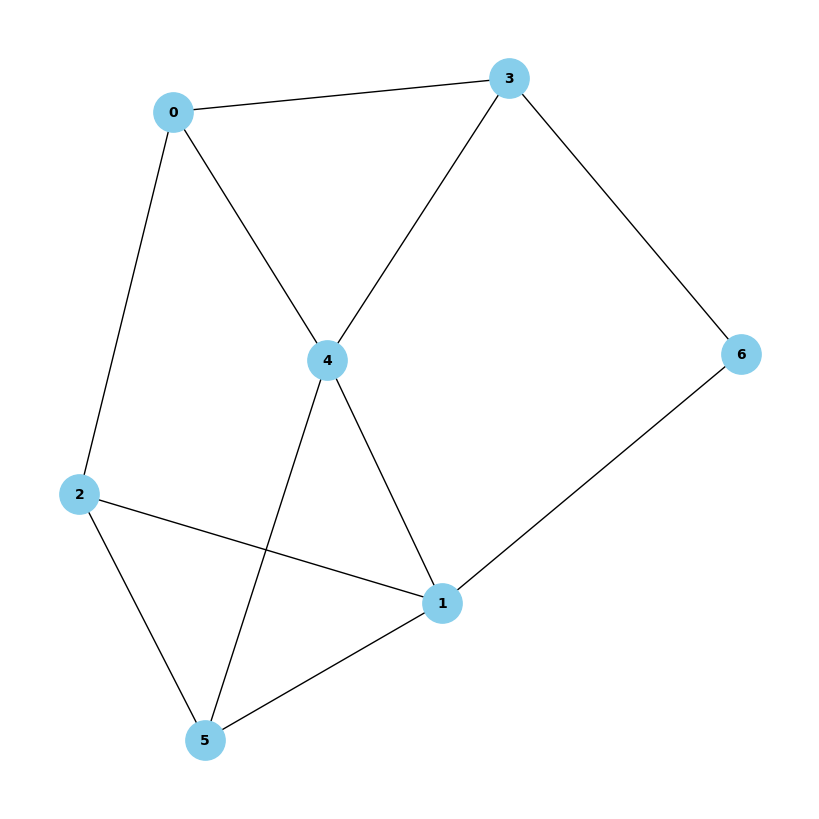

NodeView((0, 1, 2, 3, 4, 5, 6))

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G

def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'


def ekzaktno_sum(n, e):
    graf = nakljucni_zacetni_graf(n, e)
    
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_sum(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_sum(ravnovesni_graf)
        
    
    return loop_sum(graf)

opti = ekzaktno_sum(7, 11)
print(potratno_ravnovesje_sum(opti))
print(f"Premer zadnjega grafa: {nx.diameter(opti)}")
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()